In [36]:
import numpy as np
import matplotlib.pyplot as plt
from random import random
from math import cos, sin, tan, pi, sqrt, e

In [37]:
g = 9.8
v_max = 75
t = 0.01
h = 300
data_sum = 10000
data_div = 100
r = 0.5
jumsung = 10

In [38]:
class Point:
    def __init__(self, theta, x, y, v_x, v_y, m):
        self.theta = theta
        self.x, self.y = x, y
        self.v_x, self.v_y = v_x, v_y
        self.m = m

    def go(self, t):  # t를 충분히 작다고 하고 근사함
        if self.y < -h:
            return True
        self.x += self.v_x * t
        self.y += self.v_y * t  # 여기서 근사함
        self.v_y -= g * t
        return False

    def toString(self):
        return f"location({int(self.theta * 180 / pi)}, {self.x}, {self.y}), v({self.v_x}, {self.v_y}), m={self.m}"

In [39]:
# 각도, x방향, y방향, v_x, v_y, 질량 순서로 좌표 나타내기
def distance(p1, p2):
    return sqrt(p1.x ** 2 + p2.x ** 2 - 2 * p1.x * p2.x * cos(p1.theta - p2.theta) + (p1.y - p2.y) ** 2)


def merge(p1, p2):
    temp = lambda a, b: (a * p1.m + b * p2.m) / (p1.m + p2.m)
    tttt = temp(p1.theta, p2.theta)
    return Point(tttt,
                 temp(p1.x, p2.x),
                 temp(p1.y, p2.y),
                 temp(p1.v_x, p2.v_x),
                 temp(p1.v_y, p2.v_y),
                 p1.m + p2.m)


def p_of_merge(p1, p2):
    d = distance(p1, p2)
    if d < r:
        v_sangdea = sqrt((p1.v_x - p2.v_x) ** 2 + (p1.v_y - p2.v_y) ** 2)
        sigmoid = lambda x: 1 / (1 + e ** (-x + 1.5))
        return sigmoid(jumsung / (d + 0.0001) / ((v_sangdea + 0.0001)**0.8))
    else:
        return 0


hwasantan_result = []
insimulation = []

In [40]:
# init
temp = data_sum / data_div
for _ in range(int(temp)):
    v = v_max * random()
    gakdo = pi / 2 * random()
    insimulation.append(Point(
        2 * pi * random(),
        0, 0,
        v * cos(gakdo), v * sin(gakdo),
        1
    ))

In [41]:
len(insimulation)

100

In [42]:
# for i in range(len(insimulation)):
#     insimulation[i].go(t)

In [43]:
# xx, yy=[[] for _ in range(100)], [[] for _ in range(100)]
# for _ in range(10000):
#     for i in range(len(insimulation)):
#         insimulation[i].go(t)
#     for j in range(100):
#         xx[j].append(insimulation[j].x)
#         yy[j].append(insimulation[j].y)

In [44]:
# for i in range(100):
#     plt.plot(xx[i], yy[i])
# plt.show()

In [45]:
xx, yy = [[] for _ in range(data_sum)], [[] for _ in range(data_sum)]
error = (1, 1)
result=[]

bunchul=0
for _ in range(10000):
    print(f"\r{_}/10000 : {len(insimulation)}", end='')
    if bunchul<data_div:
        temp = data_sum / data_div
        for _ in range(int(temp)):
            v = v_max * random()
            gakdo = pi / 2 * random()
            insimulation.append(Point(
                2 * pi * random(),
                0, 0,
                v * cos(gakdo), v * sin(gakdo),
                1
            ))
        bunchul+=1
    newinsimulation = []
    i=0
    while i<len(insimulation):
        if insimulation[i].go(t):
            result.append(insimulation[i])
            del insimulation[i]
        else:i+=1

    i = 0
    # merge
    while i < len(insimulation):
        j = i + 1
        while j < len(insimulation):
            error = (i, j)
            tempp = p_of_merge(insimulation[i], insimulation[j])
            if random() < tempp:
                newinsimulation.append(merge(insimulation[i], insimulation[j]))
                del insimulation[i]
                j -= 1
                del insimulation[j]
            j += 1
        i += 1
    insimulation += newinsimulation
    for j in range(len(insimulation)):
        xx[j].append(insimulation[j].x)
        yy[j].append(insimulation[j].y)

9999/10000 : 000

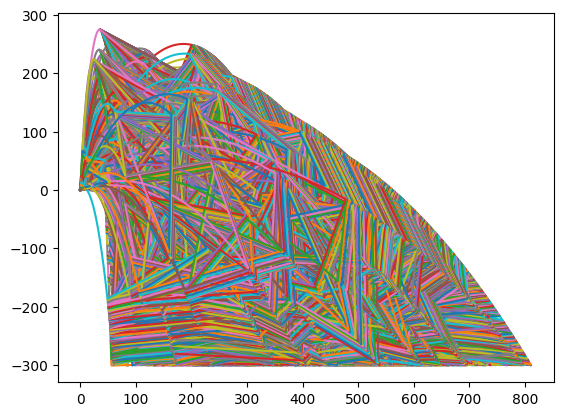

In [46]:
for i in range(data_sum):
    plt.plot(xx[i], yy[i])
plt.show()

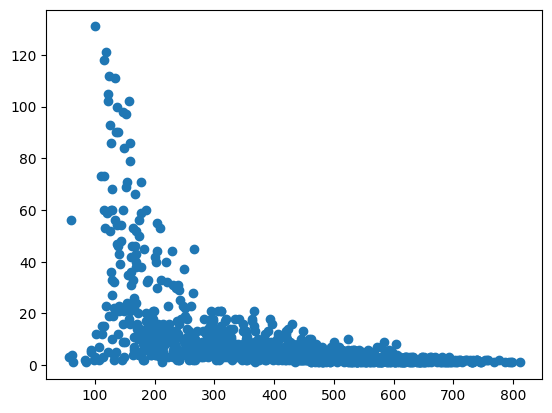

In [47]:
plt.scatter(list(map(lambda a: a.x, result)), list(map(lambda a: a.m, result)))

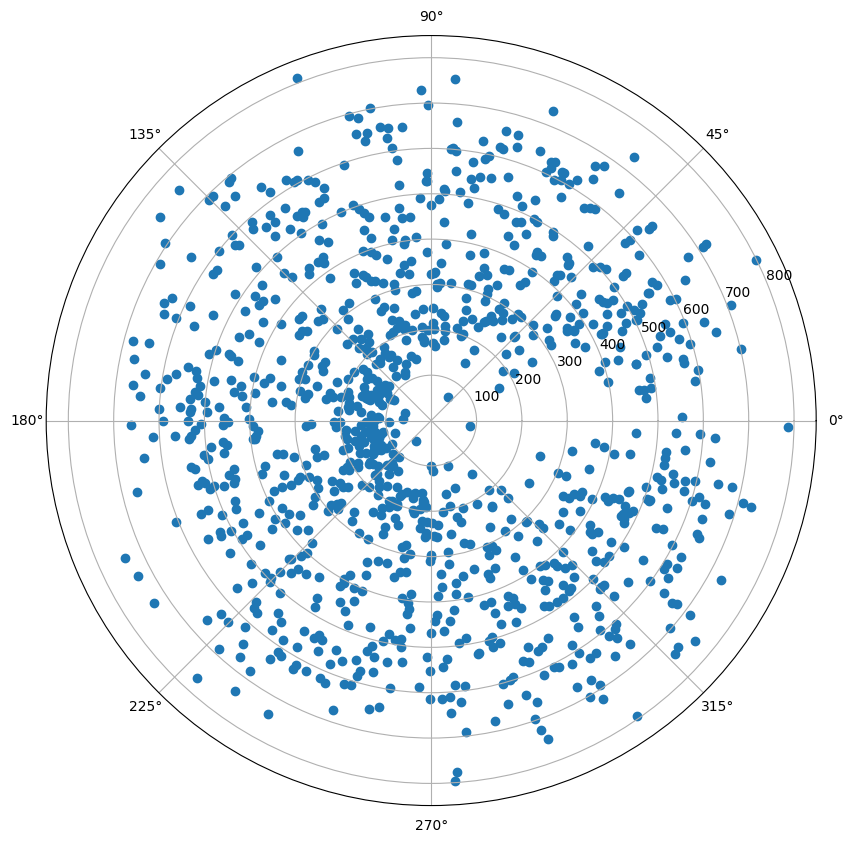

In [48]:
plt.figure(figsize=(10, 10))
plt.axes(polar=True)
plt.scatter(list(map(lambda a: a.theta, result)), list(map(lambda a: a.x, result)))

In [49]:
for i in result:
    print(i.m)

1
2
1
1
2
3
2
2
1
1
1
2
1
3
1
1
3
3
2
2
1
1
3
1
1
4
2
2
2
13
2
9
3
2
2
4
3
5
3
2
1
3
1
7
1
4
4
6
1
2
3
2
4
1
2
3
1
3
3
2
1
2
3
3
1
5
1
6
2
2
1
2
1
2
1
15
1
5
2
1
3
10
2
1
3
4
3
1
2
2
4
6
2
2
2
1
1
5
4
5
2
2
3
1
3
43
84
3
2
8
2
3
6
5
4
1
2
2
56
1
1
1
1
6
13
1
4
1
3
5
3
8
25
2
9
4
1
4
2
16
53
2
2
2
4
2
2
3
3
6
90
1
5
17
1
1
4
2
12
102
2
1
60
2
5
3
17
6
1
5
5
118
2
3
5
4
2
4
3
2
1
2
1
1
3
1
3
3
16
16
59
2
4
3
4
1
3
3
2
3
4
16
15
1
60
1
2
3
60
5
2
24
5
11
3
44
9
8
5
86
15
97
5
1
46
56
46
8
47
2
6
3
1
2
131
3
3
3
1
6
12
2
12
11
1
4
3
13
45
59
2
2
2
73
2
23
1
2
8
3
33
2
69
31
4
9
5
1
11
5
6
2
28
3
5
4
3
5
111
1
3
18
8
3
4
13
2
4
121
2
2
2
30
46
4
5
16
2
13
4
3
6
3
1
48
10
10
1
2
5
8
1
8
8
5
3
1
18
16
16
13
13
2
5
4
1
102
11
7
2
16
2
5
11
3
4
3
105
21
3
90
2
9
4
73
42
5
5
1
56
1
6
1
50
18
44
6
21
2
5
2
18
4
6
13
60
14
21
6
86
2
10
3
29
7
9
4
2
8
13
5
5
100
13
3
2
4
4
6
30
3
20
2
6
2
11
33
8
4
40
2
12
3
11
4
17
10
2
5
2
4
5
3
12
21
2
6
13
1
2
1
6
2
6
10
18
2
1
6
3
10
2
3
1
2
3
3
79
3
5
1
52
1
